In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

2024-02-27 16:26:10.784063: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-27 16:26:10.785171: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-27 16:26:10.807914: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-27 16:26:10.808572: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-27 16:26:11.163706: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
# Load the IMDB dataset
max_features = 10000
maxlen = 500
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [3]:
# Pad sequences to make them of equal length
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [4]:
# Build the model
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

2024-02-27 16:26:25.114817: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-27 16:26:25.118550: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
# Train the model
print('Training...')
history = model.fit(input_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Training...
Epoch 1/5
625/625 [==============================] - 27s 42ms/step - loss: 0.4183 - accuracy: 0.8080 - val_loss: 0.3098 - val_accuracy: 0.8744
Epoch 2/5
625/625 [==============================] - 26s 41ms/step - loss: 0.2689 - accuracy: 0.8948 - val_loss: 0.3090 - val_accuracy: 0.8724
Epoch 3/5
625/625 [==============================] - 26s 41ms/step - loss: 0.1864 - accuracy: 0.9323 - val_loss: 0.3409 - val_accuracy: 0.8744
Epoch 4/5
625/625 [==============================] - 25s 40ms/step - loss: 0.1450 - accuracy: 0.9496 - val_loss: 0.3777 - val_accuracy: 0.8726
Epoch 5/5
625/625 [==============================] - 26s 41ms/step - loss: 0.1107 - accuracy: 0.9616 - val_loss: 0.4193 - val_accuracy: 0.8736


In [7]:
# Evaluate the model
score, acc = model.evaluate(input_test, y_test, batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

782/782 [==============================] - 12s 15ms/step - loss: 0.4486 - accuracy: 0.8628
Test score: 0.4486260414123535
Test accuracy: 0.8627600073814392


In [8]:
# Count positive and negative reviews in the training set
positive_reviews = np.sum(y_train)
negative_reviews = len(y_train) - positive_reviews
print(f'Number of Positive Reviews in Training Set: {positive_reviews}')
print(f'Number of Negative Reviews in Training Set: {negative_reviews}')

Number of Positive Reviews in Training Set: 12500
Number of Negative Reviews in Training Set: 12500


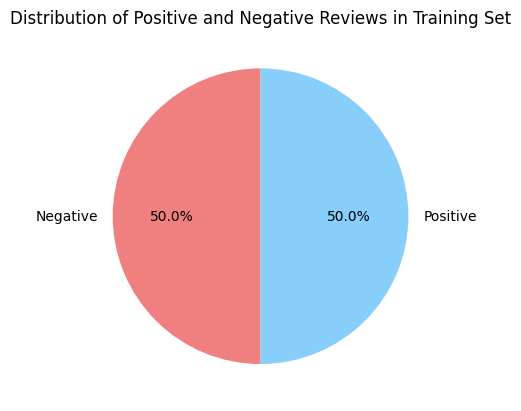

In [9]:
# Visualize the distribution of positive and negative reviews
labels = ['Negative', 'Positive']
sizes = [negative_reviews, positive_reviews]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Positive and Negative Reviews in Training Set')
plt.show()


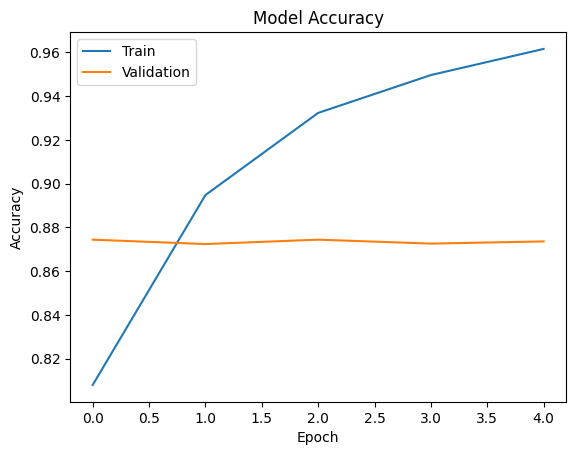

In [12]:
# Visualize training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [13]:
# Make predictions on the test set
y_pred = (model.predict(input_test) > 0.5).astype("int32")

782/782 [==============================] - 12s 15ms/step


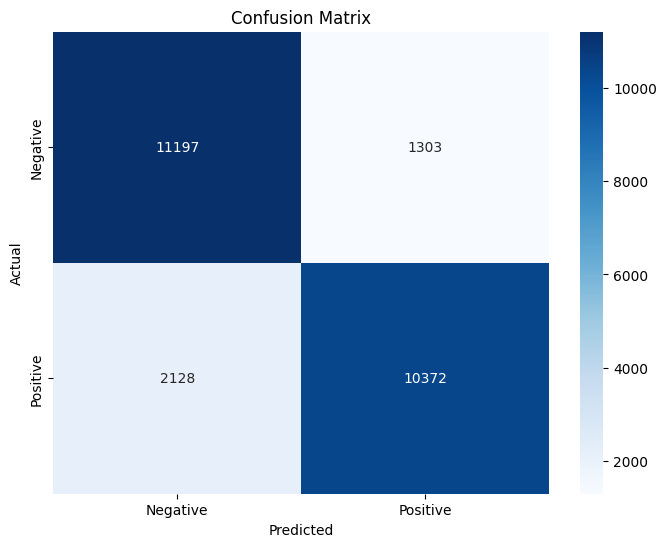

In [14]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
y_train_pred = (model.predict(input_train) > 0.9).astype("int32")

# Count positive and negative predictions on the training set
positive_train_predictions = np.sum(y_train_pred)
negative_train_predictions = len(y_train_pred) - positive_train_predictions
print(f'Number of Positive Predictions on Training Set: {positive_train_predictions}')
print(f'Number of Negative Predictions on Training Set: {negative_train_predictions}')


782/782 [==============================] - 11s 14ms/step
Number of Positive Predictions on Training Set: 10893
Number of Negative Predictions on Training Set: 14107


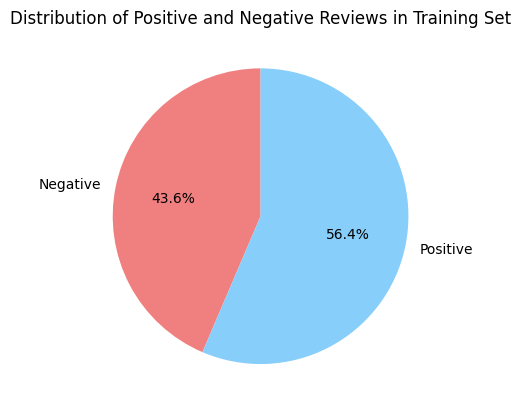

In [22]:
labels = ['Negative', 'Positive']
sizes = [positive_train_predictions, negative_train_predictions]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Positive and Negative Reviews in Training Set')
plt.show()
